In [1]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 32.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

#importing the libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import  Dense, Conv2D, Input, MaxPool2D, Flatten
%matplotlib inline

In [3]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.cifar10.load_data()

X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)

In [8]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ['airplane','automobile','bird', 'cat','deer','dog','frog','horse','ship','truck']

In [10]:
classes[0]

'airplane'

In [11]:
def plotting_sample(X, y, index):
    plt.figure(figsize=(6,6))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

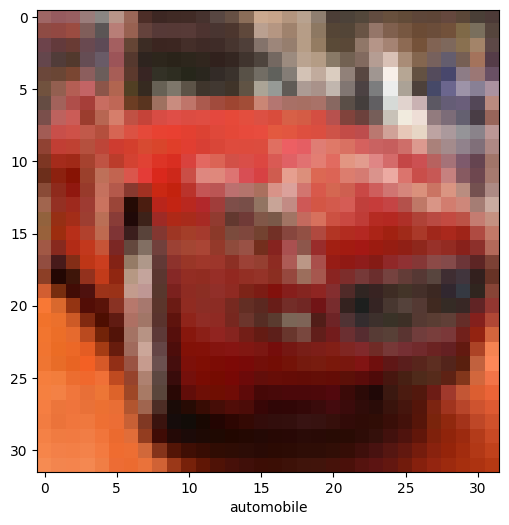

In [12]:
plotting_sample(X_train, y_train, 5)

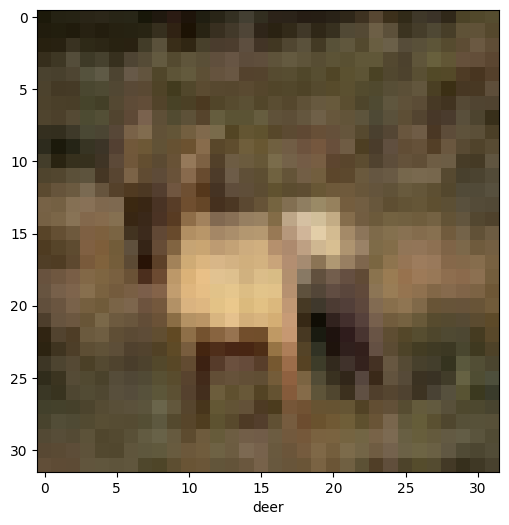

In [13]:
plotting_sample(X_train, y_train, 3)

#preprocessing the data

In [14]:
X_train = X_train / 255
X_test = X_test / 255

#creating an artificial intelligence model

In [15]:
#from keras.api._v2.keras import layers
#from tensorflow.keras import models

#ann = models.Sequential([
 #   Flatten(input_shape = (32, 32, 3)),
  #  Dense(3000, activation = 'relu'),
   # Dense(1000, activation = 'relu'),
    #Dense(10, activation = 'sigmoid')
#])

#ann.compile(optimizer = 'SGD',
 #           loss = 'categorical_crossentropy',
#          metrics = ['accuracy'])

#ann.fit(X_train, y_train, epochs = 5)

In [16]:
#making a prediction using the ann model

In [17]:
#from sklearn.metrics import confusion_matrix, classification_report

#y_pred = ann.predict(X_test)
#y_pred_classes = [np.argmax(element) for element in y_pred]

#print("classification report: \n\n", classification_report(y_test, y_pred_classes))


#building a convolutional network

In [19]:
from tensorflow.keras import models

cnn = models.Sequential([
    Conv2D(filters = 32, activation = 'relu', kernel_size = (3,3), input_shape = (32,32,3)),
    MaxPool2D(2, 2),

    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    MaxPool2D(2, 2),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])


#compiling the cnn model

In [20]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#fitting the model

In [21]:
cnn.fit(X_train , y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 74s 46ms/step - loss: 1.4721 - accuracy: 0.4720
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1379 - accuracy: 0.6029
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0002 - accuracy: 0.6512
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9200 - accuracy: 0.6790
Epoch 5/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.8487 - accuracy: 0.7046
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7938 - accuracy: 0.7228
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7416 - accuracy: 0.7400
Epoch 8/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.6979 - accuracy: 0.7540
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6581 - accuracy: 0.7674
Epoch 10/10
1563/1563 [==============================] - 71s 45m

#evaluating the model

In [22]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9918 - accuracy: 0.6825


[0.9918071031570435, 0.6825000047683716]

#reshaping the y_test data

In [23]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

#plotting a sample test image

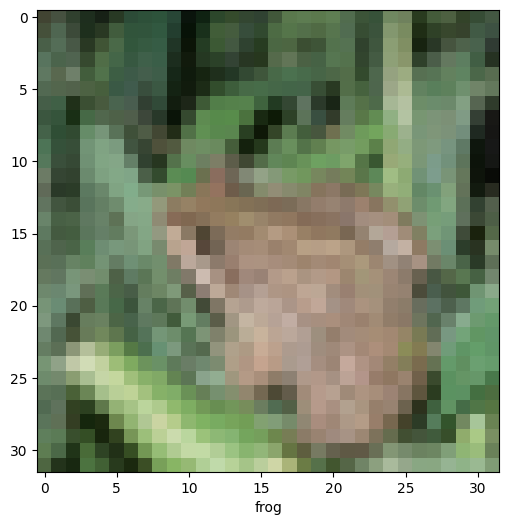

In [24]:
plotting_sample(X_test, y_test, 4)

#making a prediction

In [25]:
y_pred1 = cnn.predict(X_test)

y_classes = [np.argmax(element) for element in y_pred1]

y_classes[:5]

313/313 [==============================] - 5s 14ms/step


[3, 1, 8, 0, 4]

In [26]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [27]:
classes[y_classes[8]]

'cat'

#plotting a classification report

In [29]:
from sklearn.metrics import classification_report

print("classification report: \n\n", classification_report(y_test, y_classes))

classification report: 

               precision    recall  f1-score   support

           0       0.65      0.76      0.70      1000
           1       0.79      0.82      0.80      1000
           2       0.55      0.60      0.57      1000
           3       0.57      0.42      0.49      1000
           4       0.62      0.63      0.62      1000
           5       0.57      0.62      0.59      1000
           6       0.88      0.63      0.73      1000
           7       0.66      0.79      0.72      1000
           8       0.82      0.79      0.80      1000
           9       0.77      0.78      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

